Esto es una simulación de tres días en los que un barco recorre una zona realizando un muestreo de Bloom a ciegas para evaluar la evolucíon de éste.
Parte de fichero de telemtría generados con Matlab

In [1]:
from xdevs.sim import Coordinator
from xdevs.models import Coupled
from edge.file  import FileIn,FileOut,FussionPosBloom 
from util.event import Event,DataEventId
import datetime as dt

class TestDay(Coupled):
  '''Un ejemplo acoplado que simula un día'''
  def __init__(self, name, start, day, log=False):
    super().__init__(name)
    filePi = FileIn("ShipPos", "./data/LatLon"+day+".xlsx", start=start, dataid=DataEventId.POS3D, log=log)     
    fileBi = FileIn("DetBlo", "./data/DetBloom"+day+".xlsx",start=start, dataid=DataEventId.BLOOM, log=log)     
    EdgFus= FussionPosBloom("EdgeFussion") #Fusiona Posición del barco con medida de Sensor de Bloom
    filePB = FileOut("filePB", "./data/FileOut"+day+".xlsx", log=log)     
    self.add_component(filePi)   
    self.add_component(fileBi)
    self.add_component(EdgFus)
    self.add_component(filePB)
    self.add_coupling(filePi.o_out, EdgFus.i_Pos)
    self.add_coupling(fileBi.o_out, EdgFus.i_Blo)
    self.add_coupling(EdgFus.o_out, filePB.i_in)

In [3]:
#Day 20210801
day="20210801"
startdt=dt.datetime(2021,8,1,0,0,0)
enddt=dt.datetime(2021,8,2,0,0,0)
simseconds=(enddt-startdt).total_seconds()
coupled = TestDay("Day"+day, start=startdt, day=day, log=False)
coord = Coordinator(coupled, flatten=True)
coord.initialize()
coord.simulate_time(simseconds)
coord.exit()

<AxesSubplot:title={'center':'Bloom Detection'}, xlabel='DateTime'>

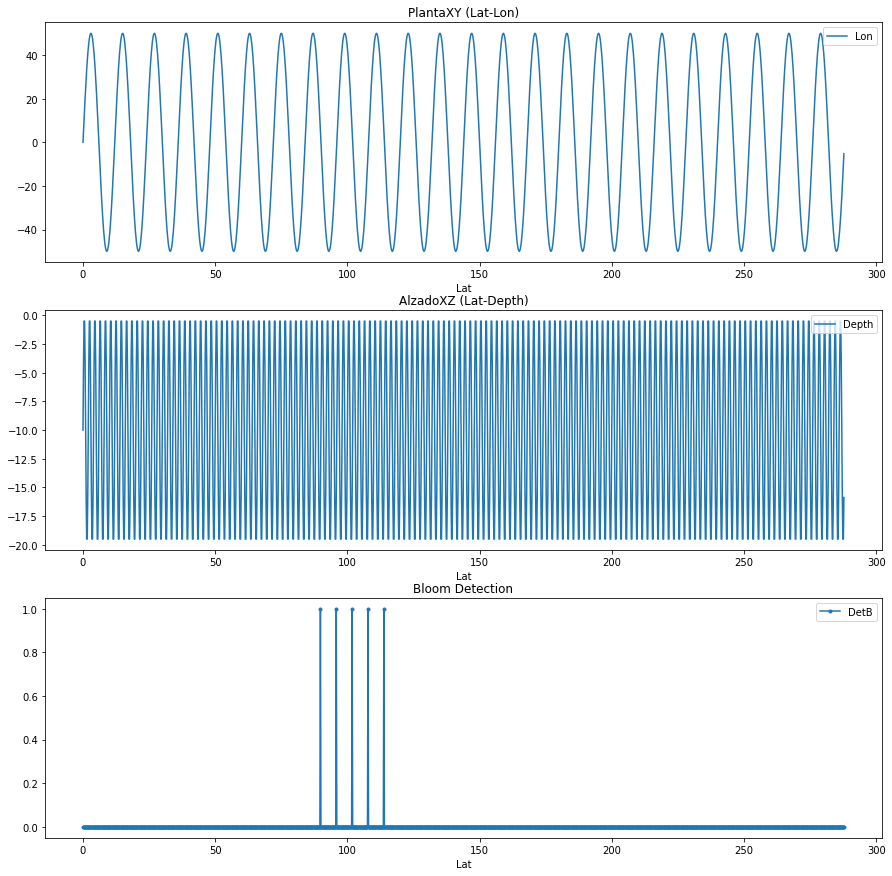

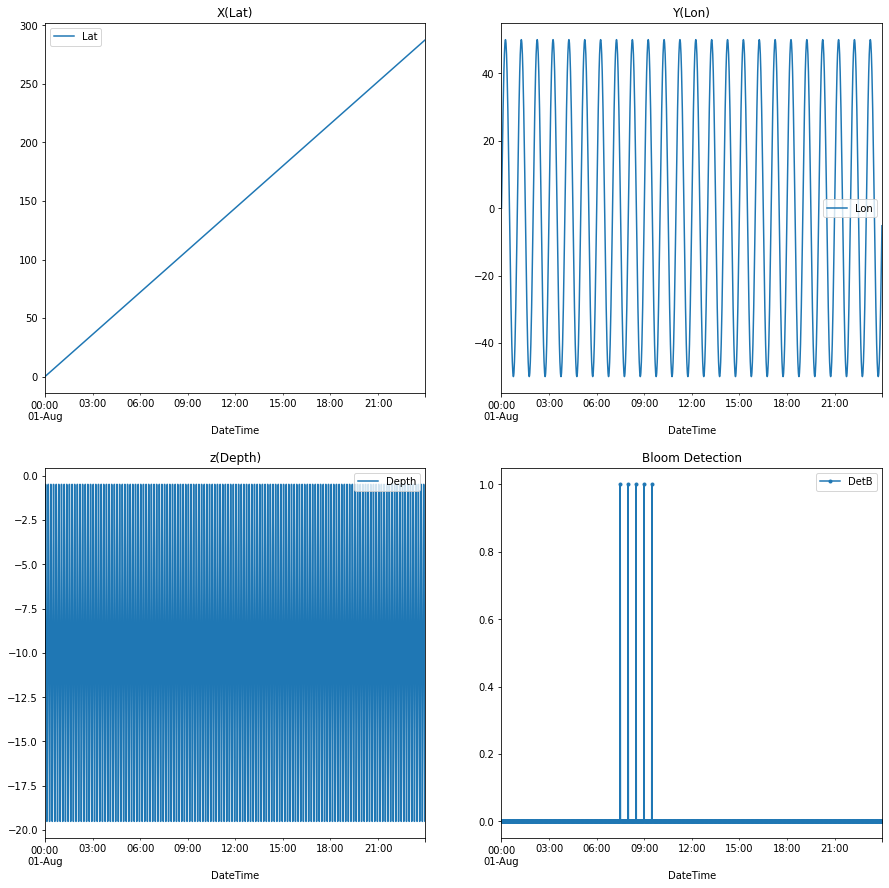

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,15)
plt.close("all")

fig, axes=plt.subplots(nrows=3,ncols=1)
PB=pd.read_excel("./data/FileOut"+day+".xlsx")  #Lectura de resultados excel
PB.plot(ax=axes[0],x='Lat',y='Lon',title='PlantaXY (Lat-Lon)')
PB.plot(ax=axes[1],x='Lat',y='Depth',title='AlzadoXZ (Lat-Depth)')
PB.plot(ax=axes[2],x='Lat',y='DetB',title='Bloom Detection',marker='.')

fig, axes=plt.subplots(nrows=2,ncols=2)
PB.plot(ax=axes[0,0],x='DateTime',y='Lat',title='X(Lat)')
PB.plot(ax=axes[0,1],x='DateTime',y='Lon',title='Y(Lon)')
PB.plot(ax=axes[1,0],x='DateTime',y='Depth',title='z(Depth)')
#PB.plot(ax=axes[1,1],x='DateTime',y='DetB',title='Bloom Detection',kind='scatter')
PB.plot(ax=axes[1,1],x='DateTime',y='DetB',title='Bloom Detection',marker='.')

Otras representaciones


C:\Users\segu2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  """


(-50.0, 50.0)

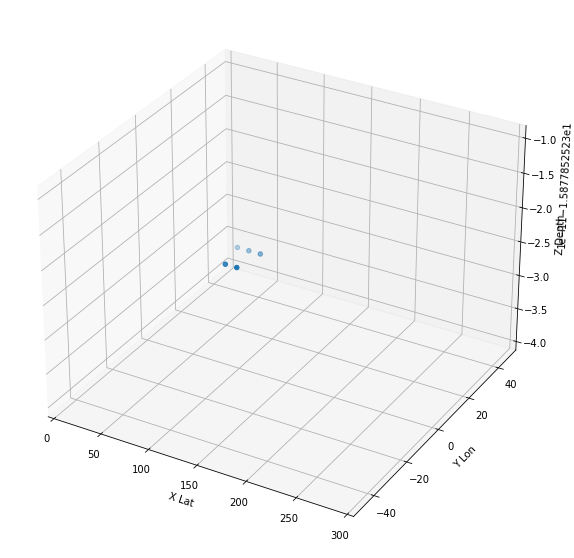

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

fig = plt.figure()
ax1 = fig.gca(projection='3d')
x=PB[PB.DetBb==1].Lat
y=PB[PB.DetBb==1].Lon
z=PB[PB.DetBb==1].Depth
ax1.scatter(x, y, z)
#ax1.bar(x,y, zs=-50, zdir='z',data=z)
ax1.set_xlabel('X Lat')
ax1.set_ylabel('Y Lon')
ax1.set_zlabel('Z Depth')
plt.xlim([0,300])
plt.ylim([-50,50])

#plt.zlim([-20,0])
